In [1]:
import ROOT

Welcome to JupyROOT 6.26/08


In [141]:
WORKDIR = "/home/choij/workspace/ChargedHiggsAnalysis"
CHANNEL = "Skim3Mu"
ERA = "2018"

signalKey = "SR3Mu/signalMuSS/pt"
promptKey = "SR3Mu/promptMu/pt"
xTitle = "p_{T}(#mu)"
yTitle = "A.U."

SIGNALs = ["MHc-70_MA-15", "MHc-70_MA-40", "MHc-70_MA-65",
           "MHc-100_MA-15", "MHc-100_MA-60", "MHc-100_MA-95",
           "MHc-130_MA-15", "MHc-130_MA-55", "MHc-130_MA-90", "MHc-130_MA-125",
           "MHc-160_MA-15", "MHc-160_MA-85", "MHc-160_MA-120", "MHc-160_MA-155"]

LowMass = ["MHc-70_MA-15", "MHc-70_MA-40", "MHc-70_MA-65", 
           "MHc-100_MA-15",
           "MHc-130_MA-15",
           "MHc-160_MA-15"]
InterMass = ["MHc-100_MA-60", "MHc-100_MA-95",
             "MHc-130_MA-55",
             "MHc-160_MA-85"]
HighMass = ["MHc-130_MA-90", "MHc-130_MA-125",
            "MHc-160_MA-120", "MHc-160_MA-155"]

In [152]:
# get histograms
signalHists = {}
promptHists = {}

for signal in LowMass:
    f = ROOT.TFile.Open(f"{WORKDIR}/data/TriLeptonBase/{ERA}/{CHANNEL}__/TriLeptonBase_TTToHcToWAToMuMu_{signal}.root")
    hSig = f.Get(signalKey); hSig.SetDirectory(0)
    hBkg = f.Get(promptKey); hBkg.SetDirectory(0)
    signalHists[signal] = hSig
    promptHists[signal] = hBkg
    f.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: csv


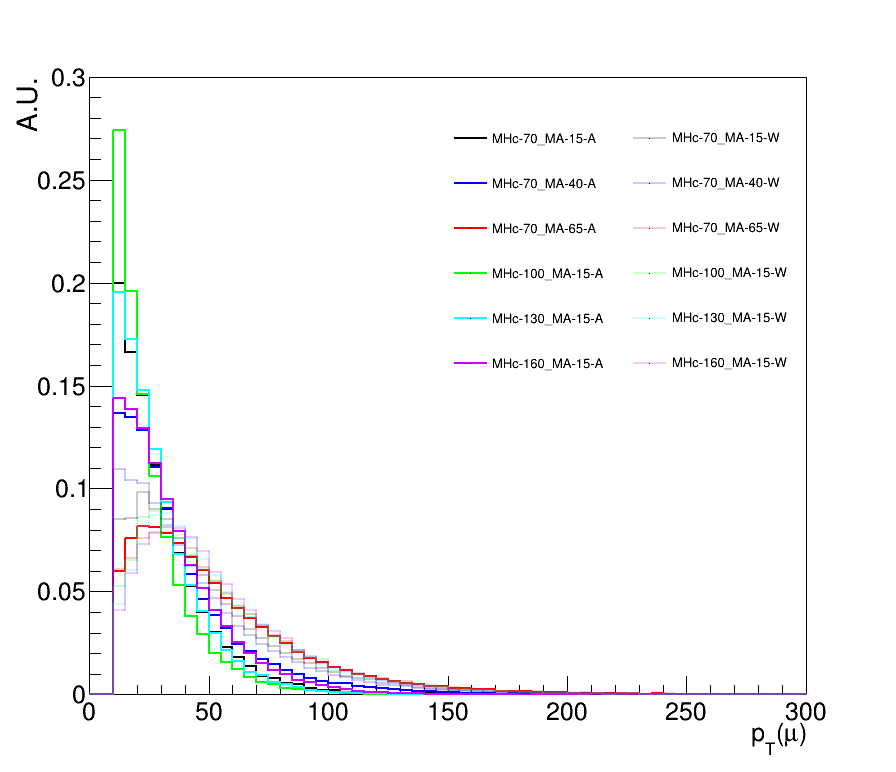

In [153]:
c = ROOT.TCanvas("csv", "", 900, 800)
lsig = ROOT.TLegend(0.5, 0.5, 0.7, 0.85)
lbkg = ROOT.TLegend(0.7, 0.5, 0.9, 0.85)
lsig.SetLineWidth(0)
lbkg.SetLineWidth(0)
c.cd()
colors = [ROOT.kBlack, ROOT.kBlue, ROOT.kRed, ROOT.kGreen, ROOT.kCyan, ROOT.kViolet]

for idx, (name, hist) in enumerate(signalHists.items()):
    hist.SetStats(0)
    hist.Rebin(5)
    hist.Scale(1./hist.Integral())
    hist.GetXaxis().SetTitle(xTitle)
    hist.GetYaxis().SetTitle(yTitle)
    hist.GetYaxis().SetTitleSize(0.04)
    hist.GetYaxis().SetTitleOffset(1.1)
    hist.GetYaxis().SetRangeUser(0, 0.3)
    hist.SetLineColor(colors[idx])
    hist.SetLineWidth(2)
    hist.Draw("same&hist")
    lsig.AddEntry(hist, f"{name}-A")
    
for idx, (name, hist) in enumerate(promptHists.items()):
    hist.SetStats(0)
    hist.Rebin(5)
    hist.Scale(1./hist.Integral())
    hist.GetYaxis().SetRangeUser(0, 0.2)
    hist.SetLineColorAlpha(colors[idx], 0.2)
    hist.SetLineWidth(2)
    hist.Draw("same&hist")
    lbkg.AddEntry(hist, f"{name}-W")
lsig.Draw("same")
lbkg.Draw("same")
c.Draw()